# Bengaluru House Price Prediction Model - Regression Problem 

In [705]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
Price = pd.read_csv('Bengaluru_House_Data.csv')
Price.head(15)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [706]:
Price.shape

(13320, 9)

In [707]:
Price.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [708]:
Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [709]:
for i, col in enumerate(['area_type','availability', 'location','society']):
    unique_values = Price[col].unique()
    print(f"'{col}': {unique_values}")


'area_type': ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
'availability': ['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul']
'location': ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur ex

## Categorical Feature Exploration,Cleaning & Feature Engineering

In [710]:
df1 = Price.drop(['total_sqft','bath','balcony'],axis=1)

In [711]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   price         13320 non-null  float64
dtypes: float64(1), object(5)
memory usage: 624.5+ KB


In [712]:
df1.head(10)

,area_type,availability,location,size,society,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,370.00


#### Dropping "Society feature" since it has high number of "na" values which is hard to see a relevant patter in 13320 rows.

In [713]:
df2 = df1.drop(['society'],axis=1)
df2.head()

,area_type,availability,location,size,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,51.00


In [714]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   price         13320 non-null  float64
dtypes: float64(1), object(4)
memory usage: 520.4+ KB


In [715]:
df3= df2.dropna()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13303 non-null  object 
 1   availability  13303 non-null  object 
 2   location      13303 non-null  object 
 3   size          13303 non-null  object 
 4   price         13303 non-null  float64
dtypes: float64(1), object(4)
memory usage: 623.6+ KB


In [716]:
df3.head()

,area_type,availability,location,size,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,51.00


####  Searching for the values in the columns in df3

In [717]:
for i, col in enumerate(['area_type','availability', 'location','size']):
    unique_values = df3[col].unique()
    print(f"'{col}': {unique_values}")

'area_type': ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
'availability': ['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' '19-May' '17-Nov' '20-Oct' '20-Jun' '19-Feb'
 '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May' '19-Oct' '21-Jul' '21-Nov'
 '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep' '21-Aug' '14-Nov' '19-Nov'
 '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov' '20-Jul' '16-Sep' '15-Oct'
 '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan' '16-Nov' '20-Apr' '16-Jan'
 '14-Jul']
'location': ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layou

- An Area type whether the area is developed or not can have a direct impact to the price of the house.

<Axes: >

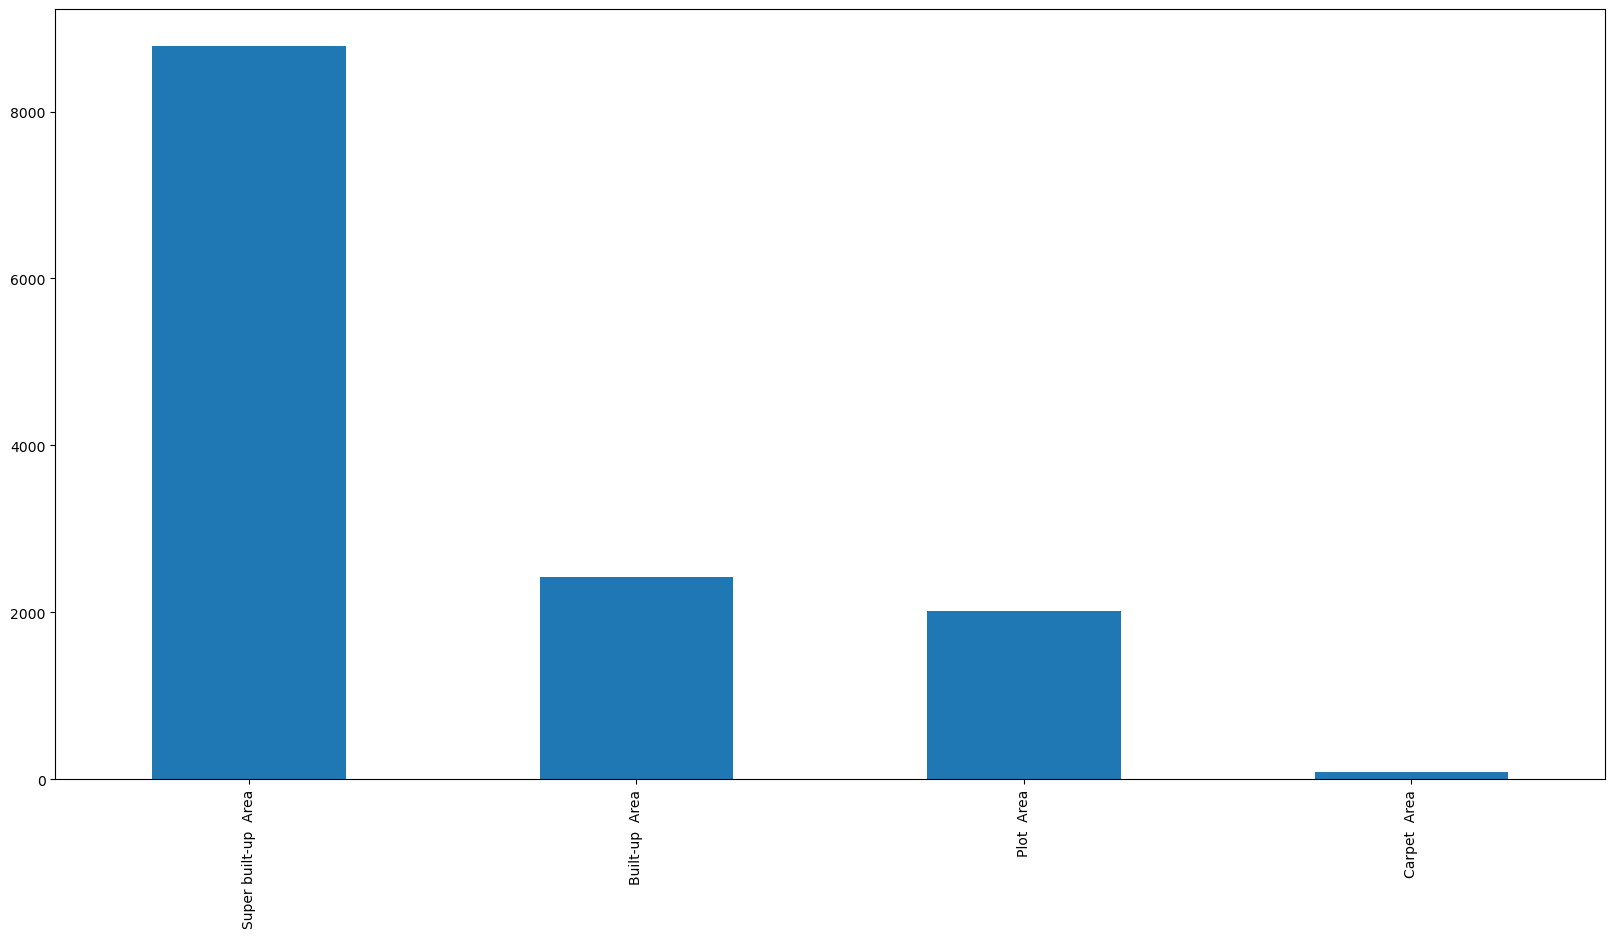

In [718]:
df3.area_type.value_counts().plot(kind='bar')

In [719]:
df3.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2009
Super built-up  Area    8789
Name: area_type, dtype: int64

In [720]:
df3_percentage = df3.groupby("area_type")["area_type"].agg("count")
total_count = df3["area_type"].count()
percentage_series = df3_percentage / total_count * 100
print(percentage_series)

area_type
Built-up  Area          18.176351
Carpet  Area             0.653988
Plot  Area              15.101857
Super built-up  Area    66.067804
Name: area_type, dtype: float64


- Carpet Area value is very less respective to the other values therefore we remove those rows

In [721]:
df4 = df3[df3["area_type"] != "Carpet  Area"].copy()
df4['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area'],
      dtype=object)

In [722]:
df4=df3
df5 = df4

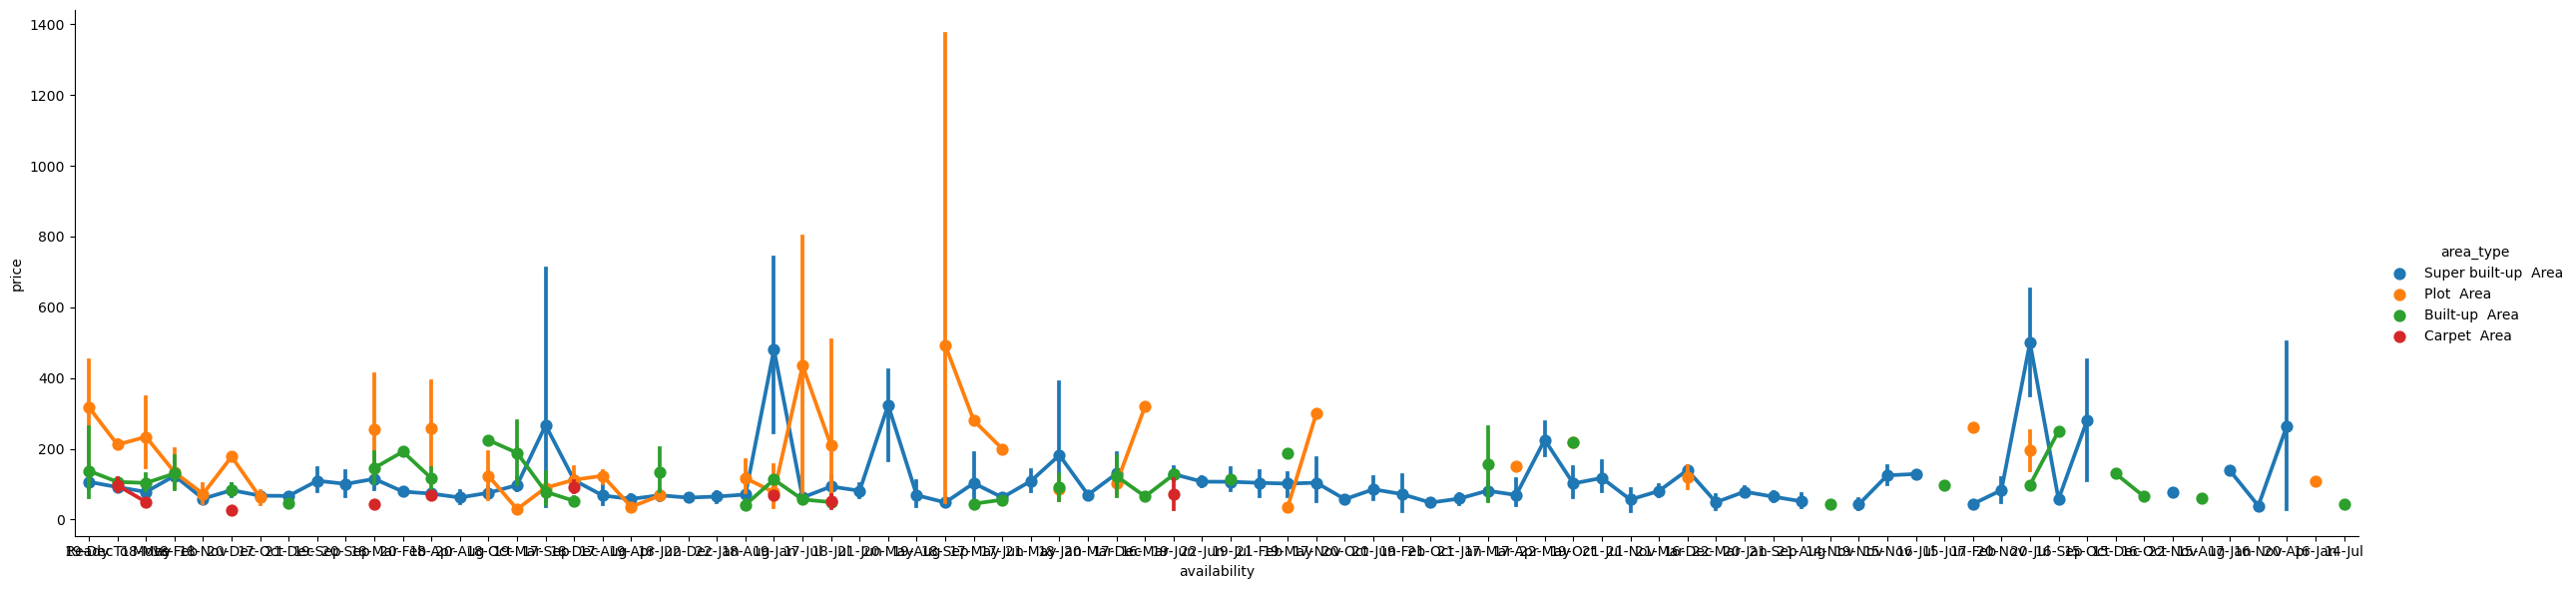

In [723]:
sns.catplot(x='availability',y='price', data=df4, hue="area_type",kind='point',height=6, aspect=4)

- Spliting availability column in order to see a pattern with the price

In [724]:
df5['available_months'] = df5['availability'].str[-3:]
#replacing the ove with 'ready to 'move'
df5['available_months'] = df5['available_months'].replace({'ove': 'Ready To Move'}, regex=True)
df5.head()

C:\Users\Venura Pussella\AppData\Local\Temp\ipykernel_8404\1212991222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['available_months'] = df5['availability'].str[-3:]
C:\Users\Venura Pussella\AppData\Local\Temp\ipykernel_8404\1212991222.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['available_months'] = df5['available_months'].replace({'ove': 'Ready To Move'}, regex=True)


,area_type,availability,location,size,price,available_months
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,39.07,Dec
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,120.00,Ready To Move
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,62.00,Ready To Move
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,95.00,Ready To Move
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,51.00,Ready To Move


In [725]:
df5['available_months'].unique()

array(['Dec', 'Ready To Move', 'May', 'Feb', 'Nov', 'Oct', 'Sep', 'Mar',
       'Apr', 'Aug', 'Jun', 'Jan', 'Jul'], dtype=object)

In [726]:
df5 = df5.rename(columns={'last_three_letters': 'available_months'}) # renanme the column
df5.head()

,area_type,availability,location,size,price,available_months
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,39.07,Dec
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,120.00,Ready To Move
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,62.00,Ready To Move
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,95.00,Ready To Move
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,51.00,Ready To Move


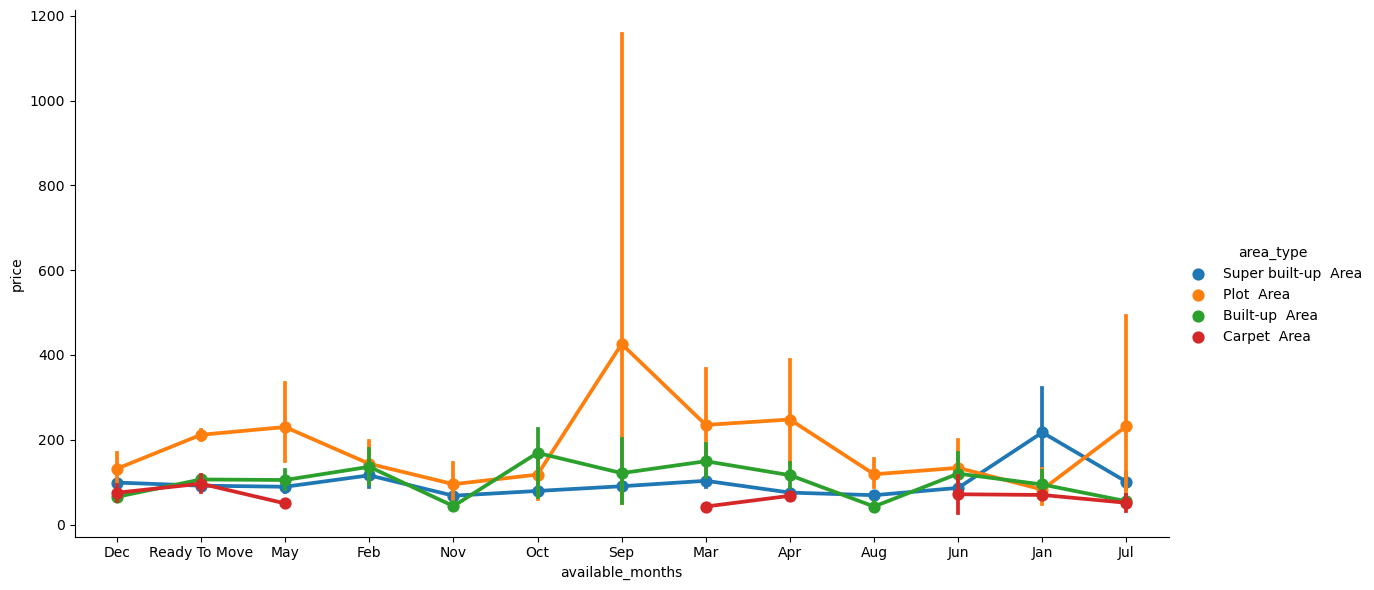

In [727]:
sns.catplot(x='available_months',y='price', hue='area_type' , data=df5,kind='point',height=6, aspect=2)

### Description on Area_types

#### Built-up Area:

- The Built-up Area includes the total area covered by the built structure, including the carpet area, walls, and balconies. It represents the actual space enclosed by the walls of the apartment or house.
It does not include common areas like stairs, corridors, lift rooms, etc.

##### Super Built-up Area:

- The Super Built-up Area is the sum of the Built-up Area and a proportionate share of common areas in the building. Common areas may include lobbies, staircases, lifts, corridors, and other shared amenities.
Builders often use the Super Built-up Area to calculate the overall cost, including the shared spaces.

##### Plot Area:

- The Plot Area refers to the total land area on which a property is constructed. It includes the entire piece of land on which a building or house is built. For independent houses or villas, the Plot Area is particularly relevant as it represents the total land owned.

### Analysis on Area_Type

- This says why the plot-areas are having the higest price with the time as well also the trend is continuous according to the other area_types.
- This plot also says privacy is little bit costly it seems in Bengaluru.

In [728]:
df6 = df5.drop(['area_type', 'availability'], axis=1)
df6.head()

,location,size,price,available_months
0,Electronic City Phase II,2 BHK,39.07,Dec
1,Chikka Tirupathi,4 Bedroom,120.00,Ready To Move
2,Uttarahalli,3 BHK,62.00,Ready To Move
3,Lingadheeranahalli,3 BHK,95.00,Ready To Move
4,Kothanur,2 BHK,51.00,Ready To Move


#### Removing some data to create a pattern if possible also to test cyclic encoding

In [729]:
df6 = df5[df5["available_months"] != "Jan"].copy()
df6['available_months'].unique()

array(['Dec', 'Ready To Move', 'May', 'Feb', 'Nov', 'Oct', 'Sep', 'Mar',
       'Apr', 'Aug', 'Jun', 'Jul'], dtype=object)

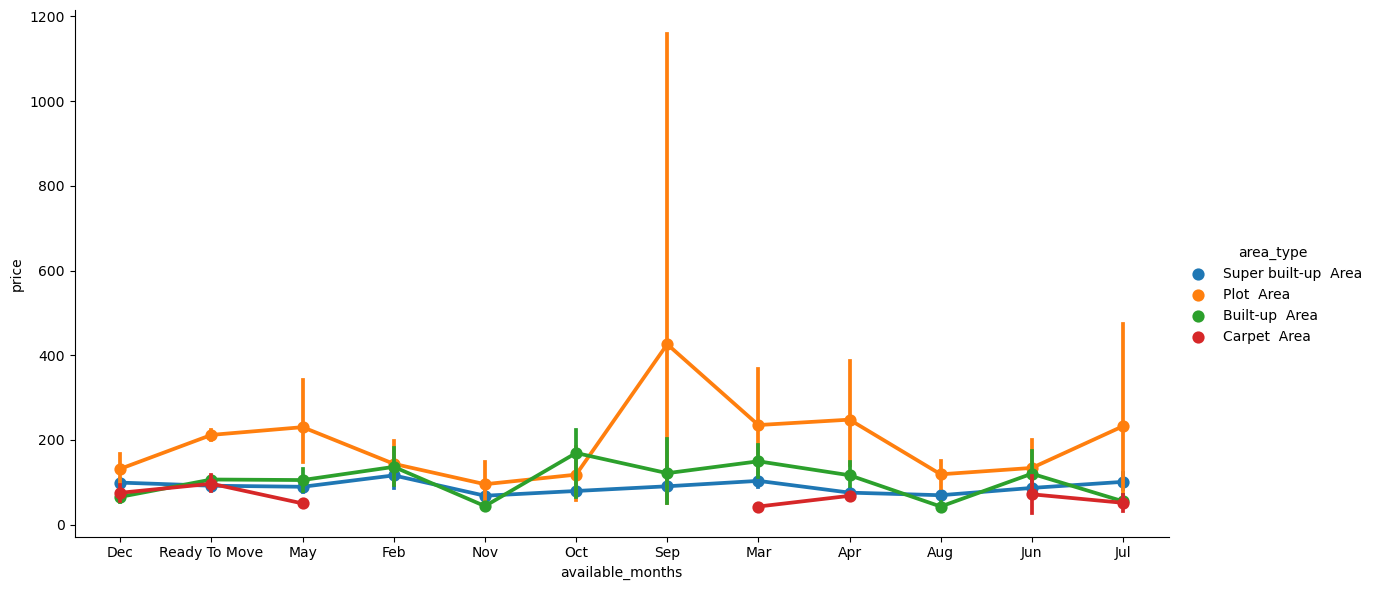

In [730]:
sns.catplot(x='available_months',y='price', hue='area_type' , data=df6,kind='point',height=6, aspect=2)

In [731]:
def cyclic_encode(month):
    month_to_number = {
        'Ready To Move': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
        'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
    }
    angle = 2 * np.pi * month_to_number[month] / 12
    return np.sin(angle), np.cos(angle)

df7 = df6.copy()
df7[['sin_month', 'cos_month']] = df7['available_months'].apply(lambda x: pd.Series(cyclic_encode(x)))

df8 = df7.drop(['area_type','availability','available_months'],axis=1)
df8.head()

,location,size,price,sin_month,cos_month
0,Electronic City Phase II,2 BHK,39.07,-2.449294e-16,1.000000
1,Chikka Tirupathi,4 Bedroom,120.00,5.000000e-01,0.866025
2,Uttarahalli,3 BHK,62.00,5.000000e-01,0.866025
3,Lingadheeranahalli,3 BHK,95.00,5.000000e-01,0.866025
4,Kothanur,2 BHK,51.00,5.000000e-01,0.866025


#### Location Feature

In [732]:
len(df8.location.unique())

1301

#### Look for Location counts

In [733]:
df8.location=df8.location.apply(lambda x: x.strip())

location_stats=df8.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield          536
Sarjapur  Road      394
Electronic City     300
Kanakpura Road      260
Thanisandra         235
                   ... 
Kanakapura  Rod       1
1 Giri Nagar          1
Kanakapura Road       1
Kanakapura Road,      1
whitefiled            1
Name: location, Length: 1290, dtype: int64

- Check how many locations have less than 10 location stats - Dimentionality Reduction

In [734]:
len(location_stats[location_stats<=10])

1050

In [735]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Naganathapura            10
Nagadevanahalli          10
1st Block Koramangala    10
Gunjur Palya             10
Sector 1 HSR Layout      10
                         ..
Kanakapura  Rod           1
1 Giri Nagar              1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1050, dtype: int64

In [736]:
df8.location=df8.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df8.location.unique())

241

#### One-Hot encoding on locations

In [737]:
df10=df8

### Size Feature (Refering to "codebasics" EDA)

In [738]:
df10['bhk']=df10['size'].apply(lambda x:int(x.split(' ')[0]))
df10.head()

,location,size,price,sin_month,cos_month,bhk
0,Electronic City Phase II,2 BHK,39.07,-2.449294e-16,1.000000,2
1,Chikka Tirupathi,4 Bedroom,120.00,5.000000e-01,0.866025,4
2,Uttarahalli,3 BHK,62.00,5.000000e-01,0.866025,3
3,Lingadheeranahalli,3 BHK,95.00,5.000000e-01,0.866025,3
4,Kothanur,2 BHK,51.00,5.000000e-01,0.866025,2


In [739]:
df10['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [740]:
df10[df10.bhk>12]

,location,size,price,sin_month,cos_month,bhk
1718,other,27 BHK,230.0,0.500000,0.866025,27
3379,other,19 BHK,490.0,0.500000,0.866025,19
3609,other,16 BHK,550.0,0.500000,0.866025,16
4684,Munnekollal,43 Bedroom,660.0,0.500000,0.866025,43
4916,other,14 BHK,125.0,0.500000,0.866025,14
9935,other,13 BHK,275.0,0.500000,0.866025,13
11559,other,18 Bedroom,200.0,0.866025,-0.500000,18


In [741]:
df10[df10.bhk>20]

,location,size,price,sin_month,cos_month,bhk
1718,other,27 BHK,230.0,0.5,0.866025,27
4684,Munnekollal,43 Bedroom,660.0,0.5,0.866025,43


In [742]:
df11=df10.drop('size',axis='columns')
df11.head()

,location,price,sin_month,cos_month,bhk
0,Electronic City Phase II,39.07,-2.449294e-16,1.000000,2
1,Chikka Tirupathi,120.00,5.000000e-01,0.866025,4
2,Uttarahalli,62.00,5.000000e-01,0.866025,3
3,Lingadheeranahalli,95.00,5.000000e-01,0.866025,3
4,Kothanur,51.00,5.000000e-01,0.866025,2


### Observation Size Feature 
-  These values aren't abnormal by looking at the prices and the sqft relating the the same row we can see.

## Concat (Cleaned Categorical Features and Continous Features)

In [743]:
import pandas as pd

# Extract the columns from df11
columns_to_add = ['total_sqft', 'bath', 'balcony']
df11_subset = Price[columns_to_add]

# Concatenate df11 and the subset of df2
df12 = pd.concat([df11, df11_subset], axis=1)

# Display the combined DataFrame
df12.head()

,location,price,sin_month,cos_month,bhk,total_sqft,bath,balcony
0,Electronic City Phase II,39.07,-2.449294e-16,1.000000,2.0,1056,2.0,1.0
1,Chikka Tirupathi,120.00,5.000000e-01,0.866025,4.0,2600,5.0,3.0
2,Uttarahalli,62.00,5.000000e-01,0.866025,3.0,1440,2.0,3.0
3,Lingadheeranahalli,95.00,5.000000e-01,0.866025,3.0,1521,3.0,1.0
4,Kothanur,51.00,5.000000e-01,0.866025,2.0,1200,2.0,1.0


In [744]:
# Check for missing values in the newly added columns of df12
missing_values = df12[['total_sqft', 'bath', 'balcony']].isna().sum()

# Display the count of missing values
print(missing_values)

total_sqft      0
bath           73
balcony       609
dtype: int64


### Plotting the bath and balcony features to see the distribution

C:\Users\Venura Pussella\AppData\Local\Temp\ipykernel_8404\3870272803.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df12.bath, ax=ax[1])
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


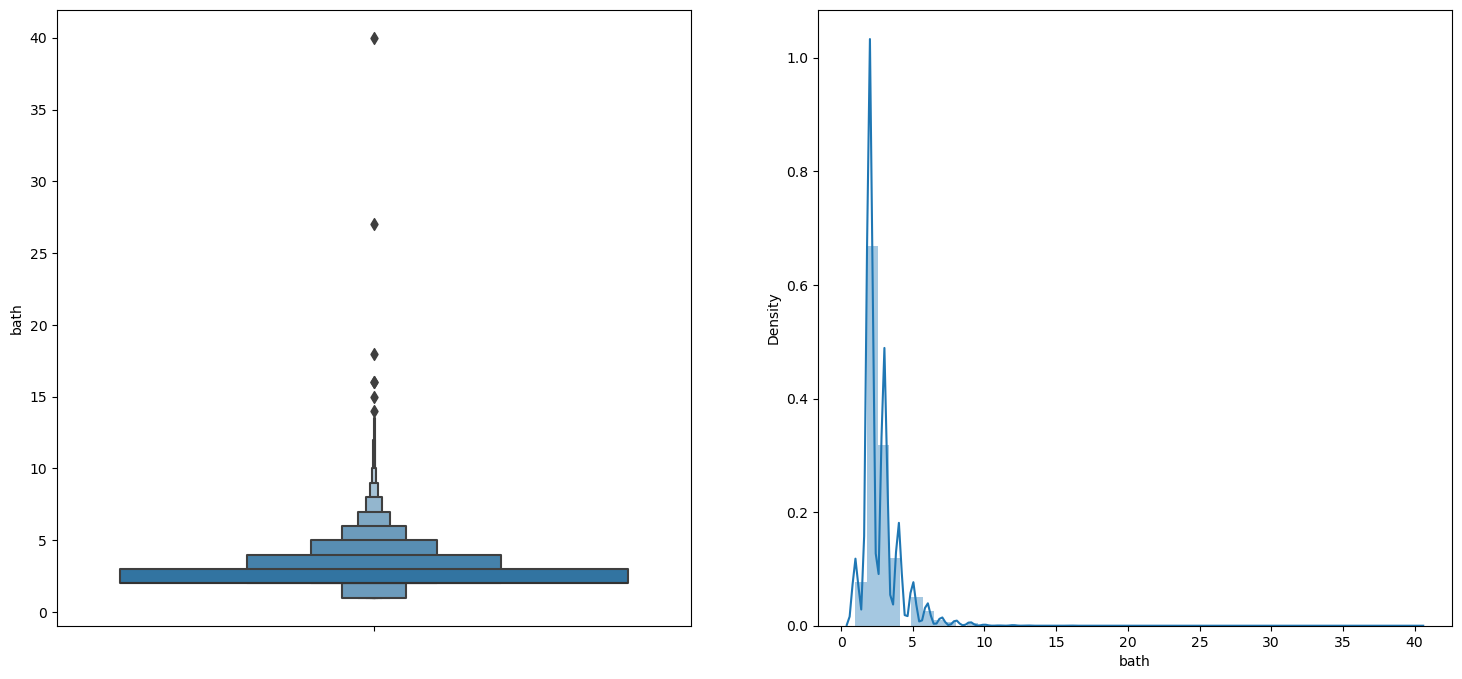

In [745]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.distplot(df12.bath, ax=ax[1])
sns.boxenplot(y=df12.bath, ax=ax[0], orient='h')
plt.show()

C:\Users\Venura Pussella\AppData\Local\Temp\ipykernel_8404\1964287292.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df12.balcony, ax=ax[1])
c:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1592: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


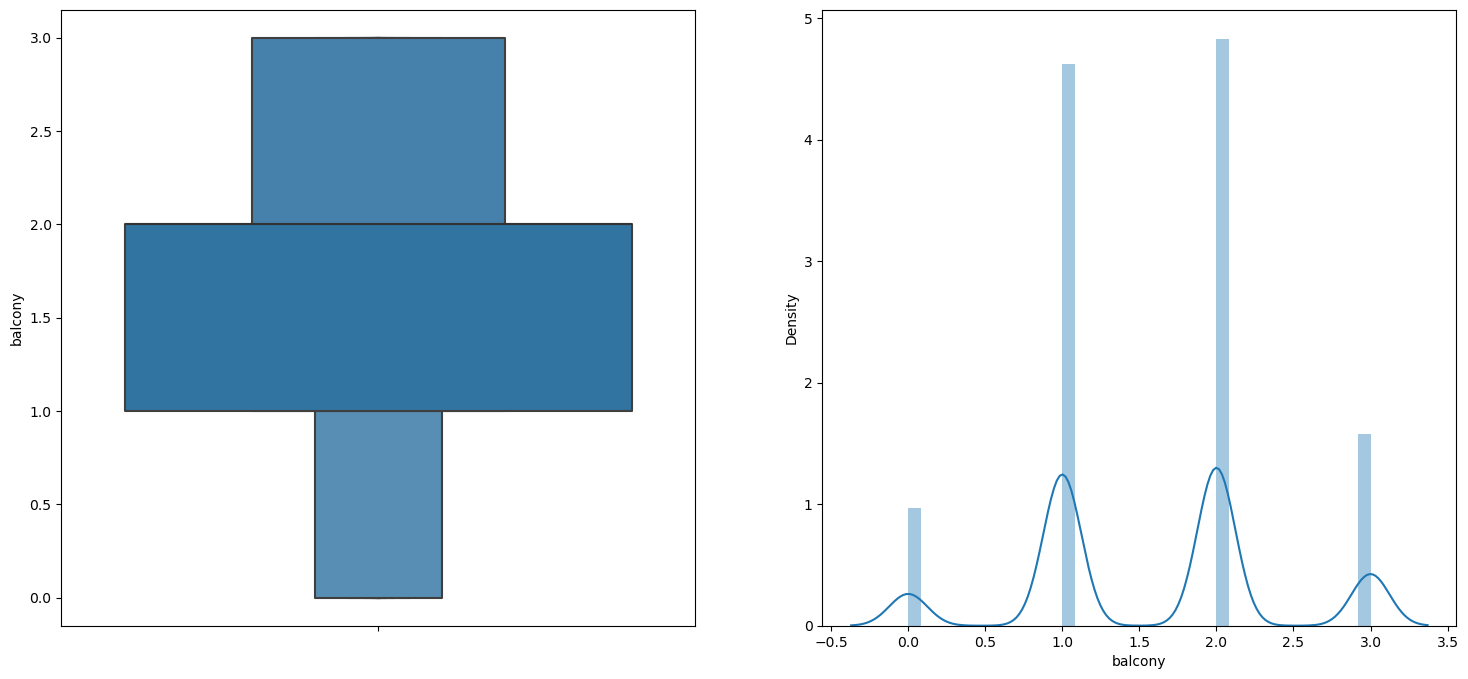

In [746]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.distplot(df12.balcony, ax=ax[1])
sns.boxenplot(y=df12.balcony, ax=ax[0], orient='h')
plt.show()

In [747]:
balcony_stats=df12.groupby('balcony')['balcony'].agg('count').sort_values(ascending=False)
balcony_stats

balcony
2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

- To replace missing values in the balcony and bath , we use median and the mode according to the distributions. There are other complex imputation methods like (from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor) we hold it just for now in order to avoid the overfitting the model to reduce complexity.

In [748]:
median_bath = df12['bath'].median()
# Mode for 'balcony' column
mode_balcony = df12['balcony'].mode().iloc[0]
# Fill missing values with median for 'bath' and mode for 'balcony'
df12['bath'].fillna(median_bath, inplace=True)
df12['balcony'].fillna(mode_balcony, inplace=True)
df12.isnull().sum()

location      143
price         143
sin_month     143
cos_month     143
bhk           143
total_sqft      0
bath            0
balcony         0
dtype: int64

In [749]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

df12[~df12['total_sqft'].apply(is_float)]


,location,price,sin_month,cos_month,bhk,total_sqft,bath,balcony
30,Yelahanka,186.000,-2.449294e-16,1.000000e+00,4.0,2100 - 2850,4.0,0.0
56,Devanahalli,192.000,8.660254e-01,5.000000e-01,4.0,3010 - 3410,2.0,2.0
81,Hennur Road,224.500,-8.660254e-01,5.000000e-01,4.0,2957 - 3450,2.0,2.0
122,Hebbal,477.000,1.000000e+00,6.123234e-17,4.0,3067 - 8156,4.0,0.0
137,8th Phase JP Nagar,54.005,1.000000e+00,6.123234e-17,2.0,1042 - 1105,2.0,0.0
...,...,...,...,...,...,...,...,...
5643,NaN,NaN,NaN,NaN,NaN,1255 - 1350,2.0,0.0
6719,NaN,NaN,NaN,NaN,NaN,800 - 2660,2.0,2.0
8703,NaN,NaN,NaN,NaN,NaN,1200 - 2400,2.0,2.0
9299,NaN,NaN,NaN,NaN,NaN,645 - 936,1.0,0.0


In [750]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2;
    try:
        return float(x)
    except:
        return None

In [751]:
df12['total_sqft']=df12['total_sqft'].apply(convert_sqft_to_num)
df12

,location,price,sin_month,cos_month,bhk,total_sqft,bath,balcony
0,Electronic City Phase II,39.07,-2.449294e-16,1.000000,2.0,1056.0,2.0,1.0
1,Chikka Tirupathi,120.00,5.000000e-01,0.866025,4.0,2600.0,5.0,3.0
2,Uttarahalli,62.00,5.000000e-01,0.866025,3.0,1440.0,2.0,3.0
3,Lingadheeranahalli,95.00,5.000000e-01,0.866025,3.0,1521.0,3.0,1.0
4,Kothanur,51.00,5.000000e-01,0.866025,2.0,1200.0,2.0,1.0
...,...,...,...,...,...,...,...,...
12997,NaN,NaN,NaN,NaN,NaN,1360.0,2.0,1.0
12998,NaN,NaN,NaN,NaN,NaN,625.0,1.0,1.0
13140,NaN,NaN,NaN,NaN,NaN,1274.0,2.0,1.0
13238,NaN,NaN,NaN,NaN,NaN,1200.0,2.0,3.0


In [752]:
df12.dropna()

,location,price,sin_month,cos_month,bhk,total_sqft,bath,balcony
0,Electronic City Phase II,39.07,-2.449294e-16,1.000000,2.0,1056.0,2.0,1.0
1,Chikka Tirupathi,120.00,5.000000e-01,0.866025,4.0,2600.0,5.0,3.0
2,Uttarahalli,62.00,5.000000e-01,0.866025,3.0,1440.0,2.0,3.0
3,Lingadheeranahalli,95.00,5.000000e-01,0.866025,3.0,1521.0,3.0,1.0
4,Kothanur,51.00,5.000000e-01,0.866025,2.0,1200.0,2.0,1.0
...,...,...,...,...,...,...,...,...
13315,Whitefield,231.00,5.000000e-01,0.866025,5.0,3453.0,4.0,0.0
13316,other,400.00,5.000000e-01,0.866025,4.0,3600.0,5.0,2.0
13317,Raja Rajeshwari Nagar,60.00,5.000000e-01,0.866025,2.0,1141.0,2.0,1.0
13318,Padmanabhanagar,488.00,1.224647e-16,-1.000000,4.0,4689.0,4.0,1.0


#### New feature price per sqft  (Refering to codebasics)

In [753]:
df13 = df12.copy()
df13['price_per_sqft'] = df13['price']*100000/df13['total_sqft']
df13.head()

,location,price,sin_month,cos_month,bhk,total_sqft,bath,balcony,price_per_sqft
0,Electronic City Phase II,39.07,-2.449294e-16,1.000000,2.0,1056.0,2.0,1.0,3699.810606
1,Chikka Tirupathi,120.00,5.000000e-01,0.866025,4.0,2600.0,5.0,3.0,4615.384615
2,Uttarahalli,62.00,5.000000e-01,0.866025,3.0,1440.0,2.0,3.0,4305.555556
3,Lingadheeranahalli,95.00,5.000000e-01,0.866025,3.0,1521.0,3.0,1.0,6245.890861
4,Kothanur,51.00,5.000000e-01,0.866025,2.0,1200.0,2.0,1.0,4250.000000


In [754]:
df13_stats = df13['price_per_sqft'].describe()
df13_stats

count    1.313200e+04
mean     7.920932e+03
std      1.070022e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.427464e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

#### Concept under Outlier Removals W.R.T to Std.

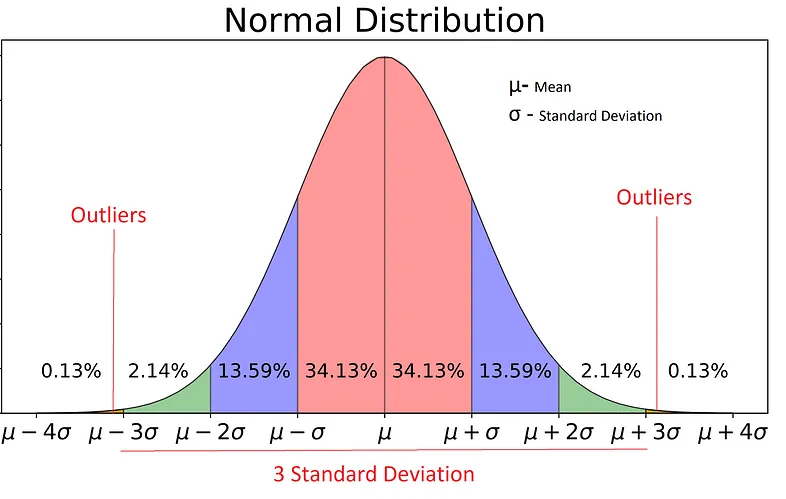

#### Outlier removal because the values of Total_sqft shows some abnnormalities with respective to the bedroom quantities 

In [755]:
df13[df13.total_sqft/df13.bhk<300].head()

,location,price,sin_month,cos_month,bhk,total_sqft,bath,balcony,price_per_sqft
9,other,370.0,0.5,0.866025,6.0,1020.0,6.0,2.0,36274.509804
45,HSR Layout,200.0,0.5,0.866025,8.0,600.0,9.0,2.0,33333.333333
58,Murugeshpalya,150.0,0.5,0.866025,6.0,1407.0,4.0,1.0,10660.980810
68,Devarachikkanahalli,85.0,0.5,0.866025,8.0,1350.0,7.0,0.0,6296.296296
70,other,100.0,0.5,0.866025,3.0,500.0,3.0,2.0,20000.000000


We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely

In [756]:
df13.shape

(13320, 9)

In [757]:
df14 = df13[~(df13.total_sqft/df13.bhk<300)]
df14.shape
df14.head(15)

,location,price,sin_month,cos_month,bhk,total_sqft,bath,balcony,price_per_sqft
0,Electronic City Phase II,39.07,-2.449294e-16,1.000000,2.0,1056.0,2.0,1.0,3699.810606
1,Chikka Tirupathi,120.00,5.000000e-01,0.866025,4.0,2600.0,5.0,3.0,4615.384615
2,Uttarahalli,62.00,5.000000e-01,0.866025,3.0,1440.0,2.0,3.0,4305.555556
3,Lingadheeranahalli,95.00,5.000000e-01,0.866025,3.0,1521.0,3.0,1.0,6245.890861
4,Kothanur,51.00,5.000000e-01,0.866025,2.0,1200.0,2.0,1.0,4250.000000
5,Whitefield,38.00,5.000000e-01,0.866025,2.0,1170.0,2.0,1.0,3247.863248
6,Old Airport Road,204.00,5.000000e-01,-0.866025,4.0,2732.0,4.0,2.0,7467.057101
7,Rajaji Nagar,600.00,5.000000e-01,0.866025,4.0,3300.0,4.0,2.0,18181.818182
8,Marathahalli,63.25,5.000000e-01,0.866025,3.0,1310.0,3.0,1.0,4828.244275
10,Whitefield,70.00,8.660254e-01,0.500000,3.0,1800.0,2.0,2.0,3888.888889


### Outlier Removal Using Standard Deviation and Mean Method

In [758]:
df14.price_per_sqft.describe()

count     12389.000000
mean       6300.118406
std        4152.146470
min         267.829813
25%        4210.526316
50%        5287.356322
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

#### Removing outliers per location

In [759]:
#Code from Codebasics
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df15 = remove_pps_outliers(df14)
df15.shape

(10196, 9)

#### Lets check the prices for 2bhk and 3bhk for a given location

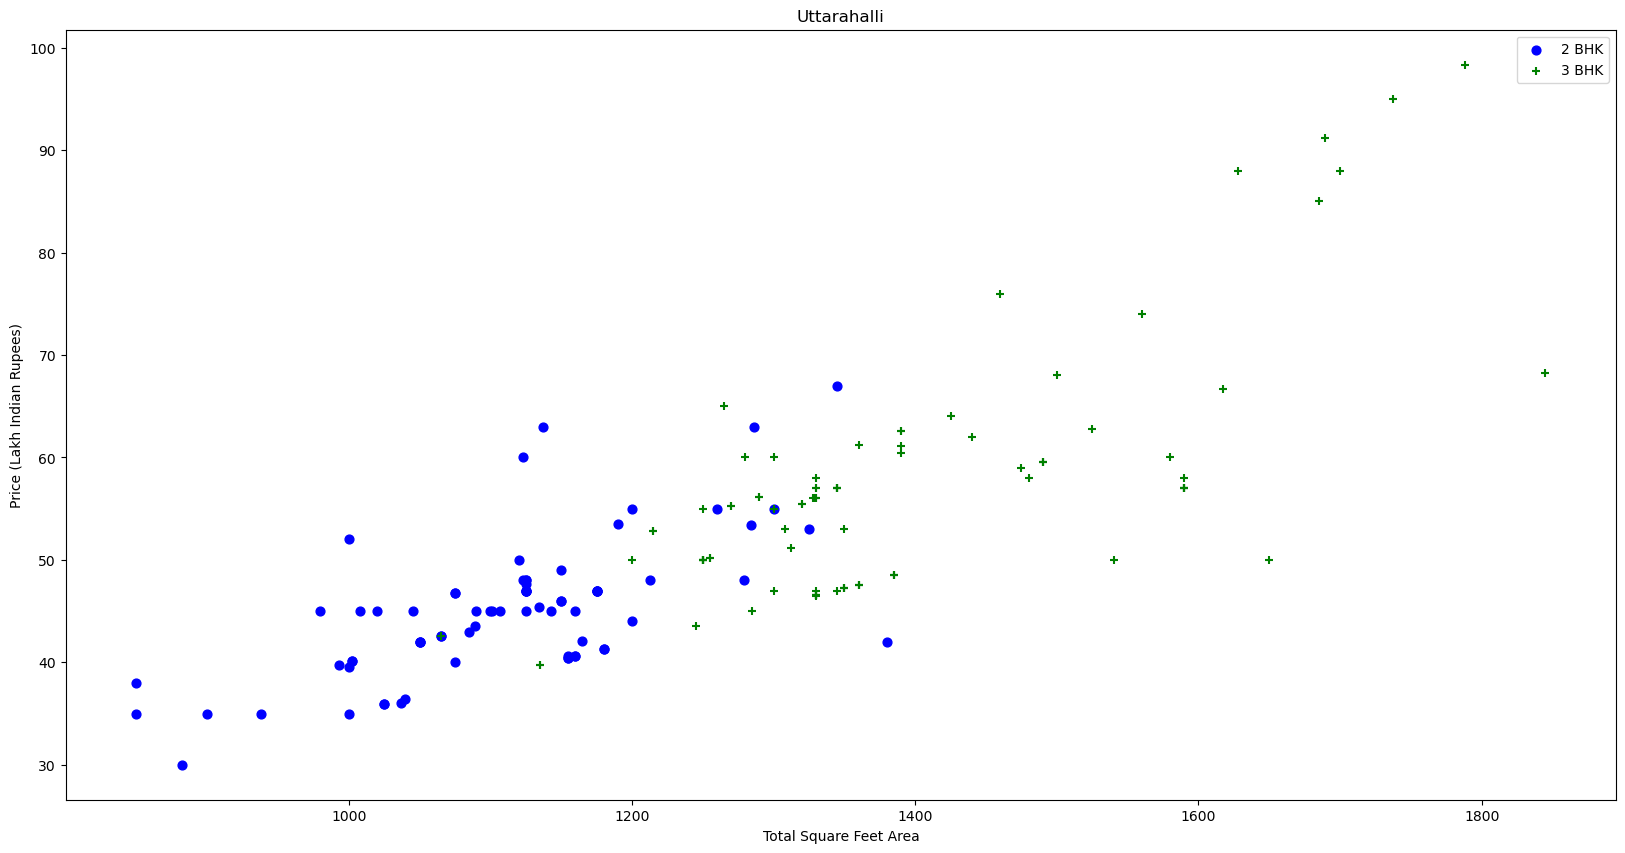

In [760]:
def plot_scatter_chart(df15,location):
    bhk2 = df15[(df15.location==location) & (df15.bhk==2)]
    bhk3 = df15[(df15.location==location) & (df15.bhk==3)]
    plt.rcParams['figure.figsize'] = (20,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=40)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=40)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df15,"Uttarahalli")

#### Lets plot another location to see the distribution

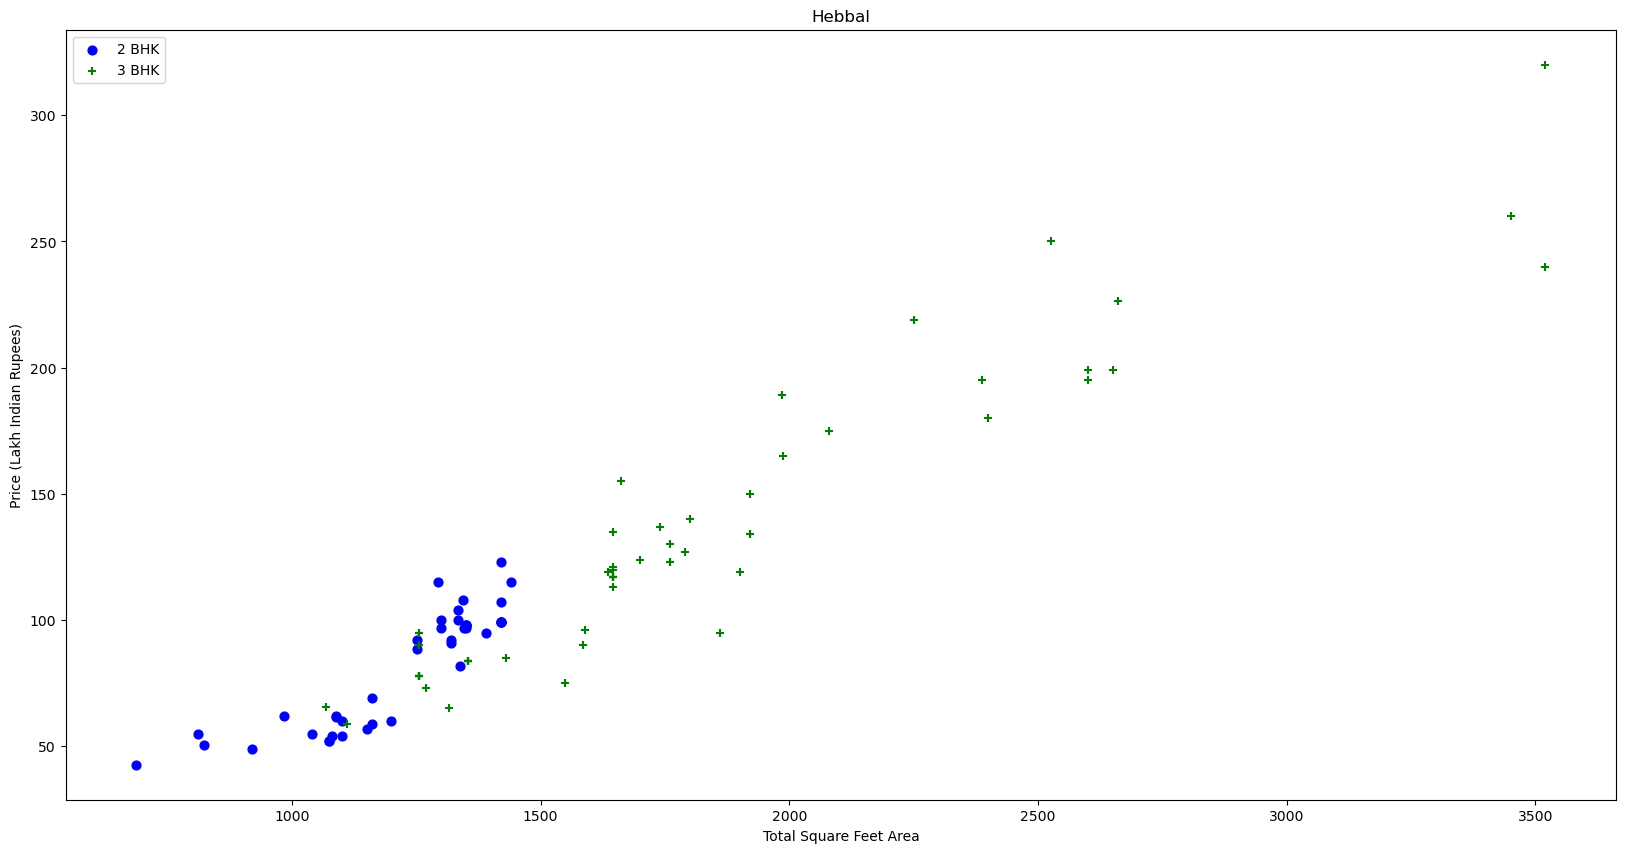

In [761]:
plot_scatter_chart(df15,"Hebbal")

lets write a function to remove 3BHK apartments whos price_per_sqft is less than 2BHK price_per_sqft mean.

In [762]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df16 = remove_bhk_outliers(df15)
df16.shape

(7324, 9)

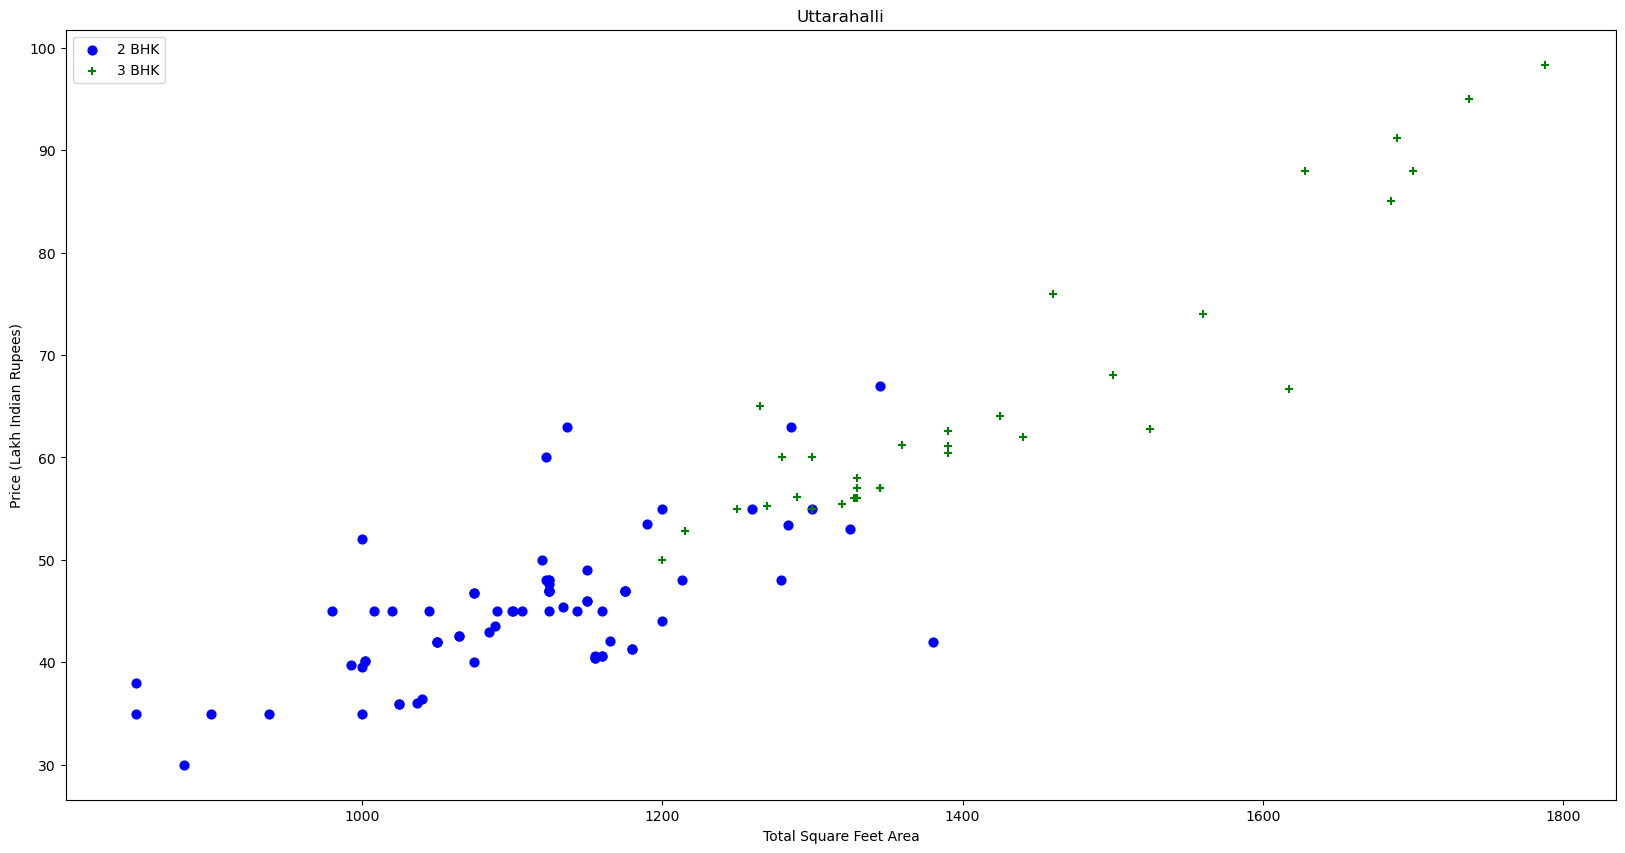

In [763]:
plot_scatter_chart(df16,"Uttarahalli")

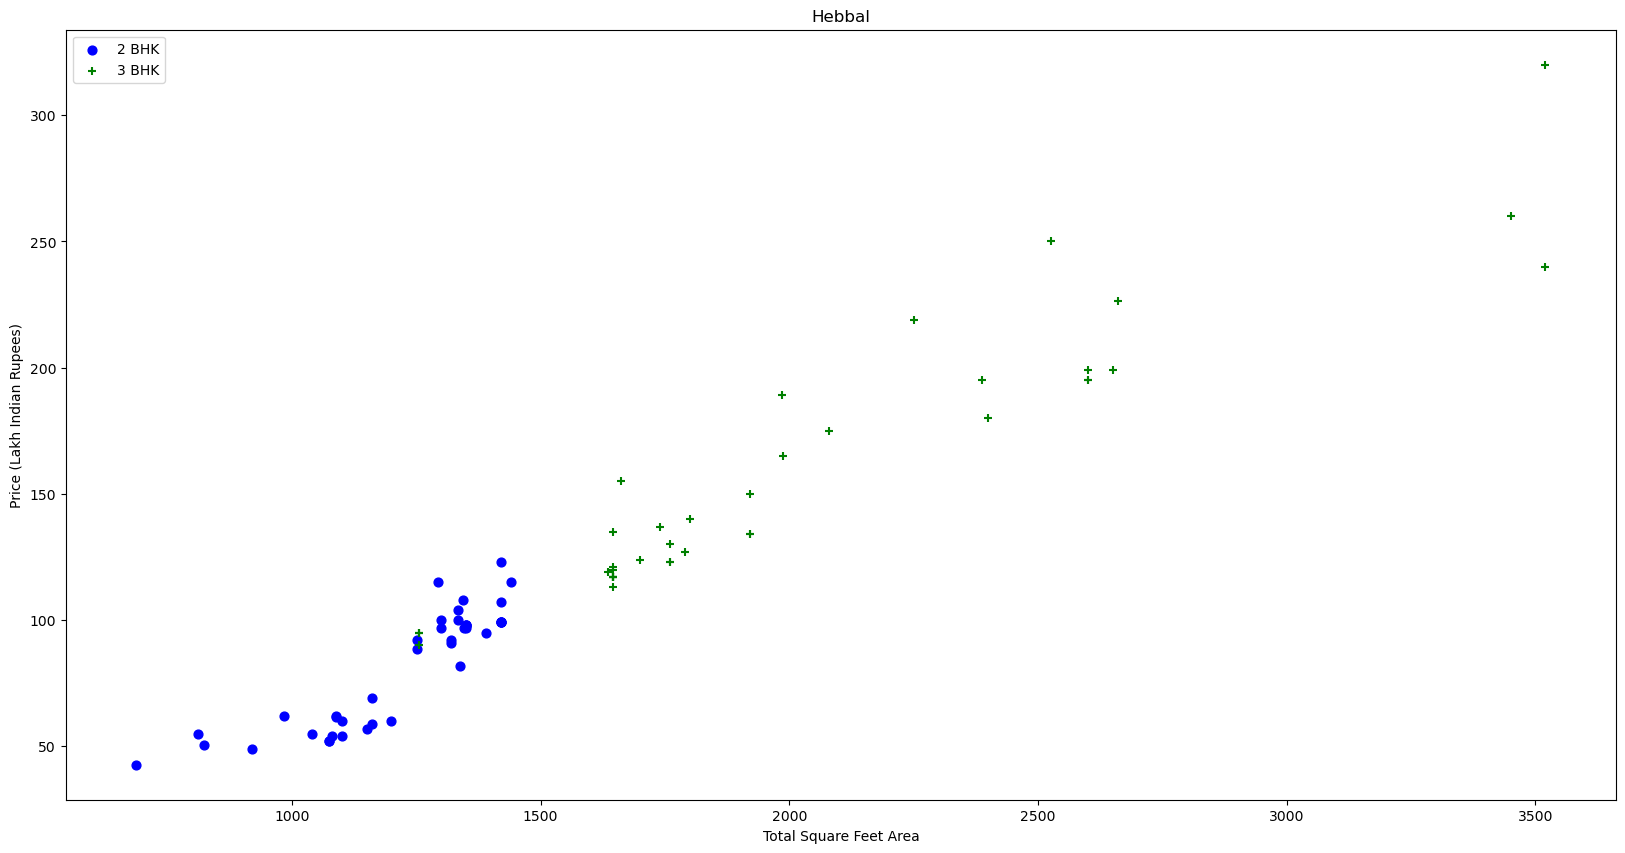

In [764]:
plot_scatter_chart(df16,"Hebbal")

cleaning the above bathroom feature,  in a single apartment there cant be bathrooms more than its bedrooms therefore we need to remove the bathrooms which has more than bhk+2.

In [765]:
df16[df16.bath>df16.bhk+2]

,location,price,sin_month,cos_month,bhk,total_sqft,bath,balcony,price_per_sqft
1596,Chikkabanavar,80.0,0.5,0.866025,4.0,2460.0,7.0,2.0,3252.032520
5212,Nagasandra,450.0,0.5,0.866025,4.0,7000.0,8.0,2.0,6428.571429
6686,Thanisandra,116.0,0.5,0.866025,3.0,1806.0,6.0,2.0,6423.034330
8378,other,1000.0,0.5,0.866025,6.0,11338.0,9.0,1.0,8819.897689


In [766]:
df17= df16[df16.bath<df16.bhk+2]
df17.shape

(7246, 9)

### One-Hot Encoding for Location

In [767]:
dummies = pd.get_dummies(df17.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [768]:
df18 = pd.concat([df17,dummies.drop('other',axis='columns')],axis='columns')
df18.head()

,location,price,sin_month,cos_month,bhk,total_sqft,bath,balcony,price_per_sqft,1st Block Jayanagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,428.0,5.000000e-01,-0.866025,4.0,2850.0,4.0,1.0,15017.543860,1,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,194.0,1.224647e-16,-1.000000,3.0,1630.0,3.0,2.0,11901.840491,1,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,235.0,5.000000e-01,0.866025,3.0,1875.0,2.0,3.0,12533.333333,1,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,130.0,-2.449294e-16,1.000000,3.0,1200.0,2.0,0.0,10833.333333,1,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,148.0,1.224647e-16,-1.000000,2.0,1235.0,2.0,2.0,11983.805668,1,...,0,0,0,0,0,0,0,0,0,0


In [769]:
df19 = df18.drop(['location', 'price_per_sqft', 'balcony'], axis=1)
df19.head()

,price,sin_month,cos_month,bhk,total_sqft,bath,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,428.0,5.000000e-01,-0.866025,4.0,2850.0,4.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,194.0,1.224647e-16,-1.000000,3.0,1630.0,3.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,235.0,5.000000e-01,0.866025,3.0,1875.0,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,130.0,-2.449294e-16,1.000000,3.0,1200.0,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,148.0,1.224647e-16,-1.000000,2.0,1235.0,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [770]:
df20 = df19.drop(['sin_month','cos_month'], axis=1)
df20.head()

,price,bhk,total_sqft,bath,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,428.0,4.0,2850.0,4.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,194.0,3.0,1630.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,235.0,3.0,1875.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,130.0,3.0,1200.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,148.0,2.0,1235.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [771]:
df21 = df20.iloc[:, :4]
df21.head()

,price,bhk,total_sqft,bath
0,428.0,4.0,2850.0,4.0
1,194.0,3.0,1630.0,3.0
2,235.0,3.0,1875.0,2.0
3,130.0,3.0,1200.0,2.0
4,148.0,2.0,1235.0,2.0


#### Checking Correlation

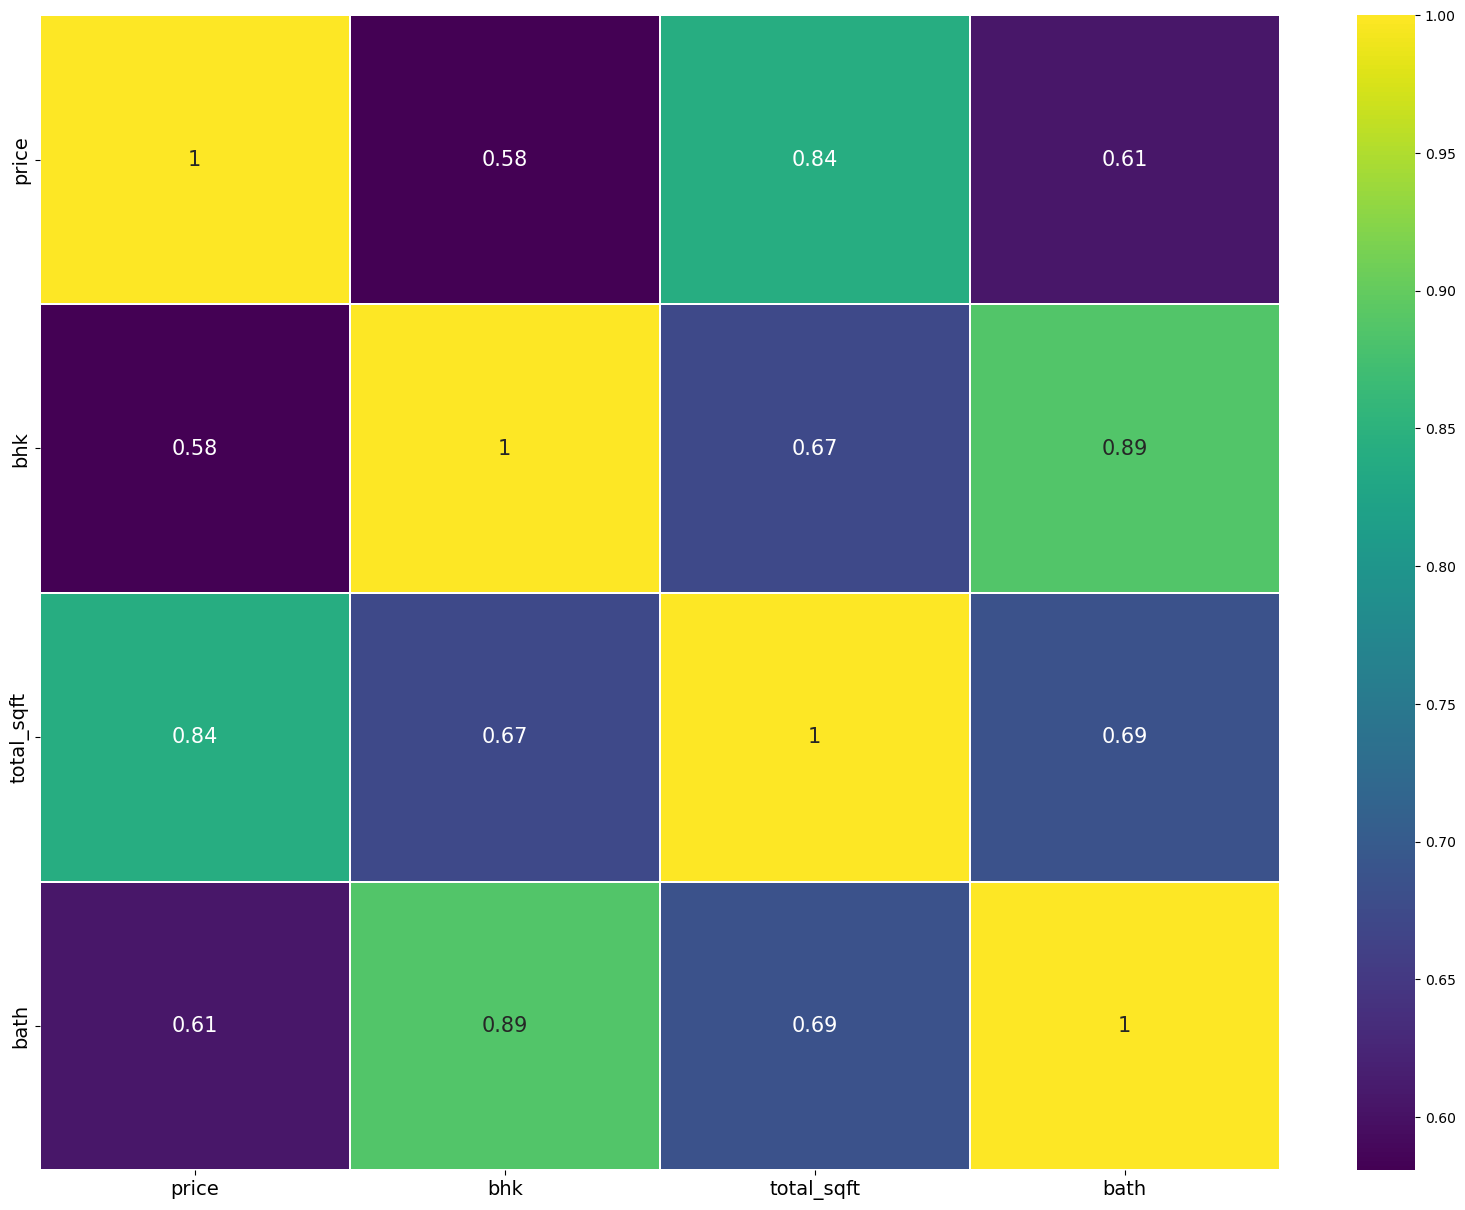

In [772]:
sns.heatmap(df21.corr(), annot=True, linewidth=0.2, annot_kws={"size":15}, cmap="viridis")
fig = plt.gcf()
fig.set_size_inches(20,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Model Building

In [773]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)

features = df20.drop('price',axis=1)
labels = df20['price']
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.4,random_state=42)
x_test,x_val,y_test,y_val = train_test_split(x_test,y_test,test_size=0.5,random_state=42)

for dataset in (y_train,y_val,y_test):
        print(round(len(dataset)/len(labels),2))

0.6
0.2
0.2


### Write Out Data into CSV

In [774]:
x_train.to_csv('train_features.csv',index=False)
x_val.to_csv('val_features.csv',index=False)
x_test.to_csv('test_features.csv',index=False)

y_train.to_csv('train_labels.csv',index=False)
y_val.to_csv('val_labels.csv',index=False)
y_test.to_csv('test_lables.csv',index=False)

#### Feature Scaling

In [775]:
from sklearn.preprocessing import StandardScaler

x_train = pd.read_csv('train_features.csv')
x_val = pd.read_csv('val_features.csv')
x_test = pd.read_csv('test_features.csv')
x_train.head()

,bhk,total_sqft,bath,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2.0,925.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1143.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1260.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.0,1125.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,775.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [776]:
# Fit the scaler on the training data
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [777]:
# Scale the training, test, and validation sets
features = x_train.columns

x_train[features] = scaler.transform(x_train[features])
x_val[features] = scaler.transform(x_val[features])
x_test[features] = scaler.transform(x_test[features])

x_val.head()

,bhk,total_sqft,bath,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1.704670,2.494868,1.751982,-0.037178,-0.048018,-0.030348,-0.021455,-0.033934,-0.052613,-0.040161,...,-0.066257,0.0,-0.026279,-0.062659,-0.18905,-0.040161,-0.110032,-0.056842,-0.033934,-0.072932
1,-0.550755,-0.340656,-0.450408,-0.037178,-0.048018,-0.030348,-0.021455,-0.033934,-0.052613,-0.040161,...,-0.066257,0.0,-0.026279,-0.062659,-0.18905,-0.040161,-0.110032,-0.056842,-0.033934,-0.072932
2,1.704670,-0.116025,1.751982,-0.037178,-0.048018,-0.030348,-0.021455,-0.033934,-0.052613,-0.040161,...,-0.066257,0.0,-0.026279,-0.062659,-0.18905,-0.040161,-0.110032,-0.056842,-0.033934,-0.072932
3,-0.550755,-0.323015,-0.450408,-0.037178,-0.048018,-0.030348,-0.021455,-0.033934,-0.052613,-0.040161,...,-0.066257,0.0,-0.026279,-0.062659,-0.18905,-0.040161,-0.110032,-0.056842,-0.033934,-0.072932
4,0.576957,0.433203,0.650787,-0.037178,-0.048018,-0.030348,-0.021455,-0.033934,-0.052613,-0.040161,...,-0.066257,0.0,-0.026279,-0.062659,-0.18905,-0.040161,-0.110032,-0.056842,-0.033934,-0.072932


### K Fold - Cross Validation Linear Regression

In [778]:
tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv')

lr = LinearRegression()
scores = cross_val_score(lr,tr_features,tr_labels.values.ravel(),cv=5)
print(scores)

[0.83204723 0.80919429 0.91169187 0.85147378 0.84503673]


### K Fold - Cross Validation Lasso

In [779]:
tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv')

ls = Lasso()
scores = cross_val_score(ls,tr_features,tr_labels.values.ravel(),cv=5)
print(scores)

[0.69524182 0.62148192 0.81795738 0.70972393 0.66487734]


### K Fold - Cross Validation Decision Tree Regressor

In [781]:
tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv')

dtr = DecisionTreeRegressor()
scores = cross_val_score(dtr,tr_features,tr_labels.values.ravel(),cv=5)
print(scores)

[0.71968934 0.67653171 0.70382104 0.69549861 0.72243866]


The results of K-fold cross-validation indicate that the linear regression algorithm exhibits higher accuracy than other regression models. Consequently, we proceed to further hyperparameter tuning to identify the best model.

### Hyperparameter Tuning - (Linear Regression Model)

In [782]:
#Finding the results of every hyperparameter combination about the average accuracy score across the five folds and the STD across the same.
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [784]:
lr = LinearRegression()
parameters = {'fit_intercept': [True, False], 'copy_X': [True, False], 'n_jobs': [None, 1, 2, 4], 'positive': [True, False]}
cv=GridSearchCV(lr,parameters,cv=5)
cv.fit(tr_features,tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

0.818 (+/-0.073) for {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': True}
0.85 (+/-0.068) for {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
0.818 (+/-0.073) for {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': True}
0.85 (+/-0.068) for {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}
0.818 (+/-0.073) for {'copy_X': True, 'fit_intercept': True, 'n_jobs': 2, 'positive': True}
0.85 (+/-0.068) for {'copy_X': True, 'fit_intercept': True, 'n_jobs': 2, 'positive': False}
0.818 (+/-0.073) for {'copy_X': True, 'fit_intercept': True, 'n_jobs': 4, 'positive': True}
0.85 (+/-0.068) for {'copy_X': True, 'fit_intercept': True, 'n_jobs': 4, 'positive': False}
0.785 (+/-0.079) for {'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'positive': True}
-84338919157432.81 (+/-337355676629734.6) for {'copy_X': True, 'fit_inter

#### Feature Impotance 

In [812]:
coefficients = lr.coef_
feature_names = tr_features.columns

# Create a DataFrame to display coefficients for specific features
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Extract coefficients for specific features ('bath', 'total_sqft', 'bhk')
selected_features = ['bath', 'total_sqft', 'bhk']
selected_coefficients = coefficients_df[coefficients_df['Feature'].isin(selected_features)]

# Display the DataFrame for selected features
print(selected_coefficients)

      Feature  Coefficient
0         bhk    -1.916083
1  total_sqft     0.073856
2        bath     7.295133


### Linear Regression Model Evaluation

In [793]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv')

val_features = pd.read_csv('val_features.csv') # Validation set to make the first prediction
val_labels = pd.read_csv('val_labels.csv')

te_features = pd.read_csv('test_features.csv') # Test we use as a double confirmation to the result from validation data set.
te_label = pd.read_csv('test_lables.csv')

In [804]:
#Refit on the full training set? yes, cz in five fold CV we test 80% of data in eachloop thats why.
from sklearn.linear_model import LinearRegression

# Create Linear Regression model with specified hyperparameters
lr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, positive=False)
lr.fit(tr_features,tr_labels.values.ravel())


LinearRegression()

In [806]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the validation set
val_predictions = lr.predict(val_features)

# Evaluate the predictions using metrics
mae = mean_absolute_error(val_labels, val_predictions)
mse = mean_squared_error(val_labels, val_predictions)
r2 = r2_score(val_labels, val_predictions)

# Display the evaluation metrics
print('Mean Absolute Error (MAE):', round(mae, 3))
print('Mean Squared Error (MSE):', round(mse, 3))
print('R-squared (R²):', round(r2, 3))



Mean Absolute Error (MAE): 17.67
Mean Squared Error (MSE): 943.465
R-squared (R²): 0.848


R Squared ->> R² ranges from 0 to 1, where 1 indicates a perfect fit.
Higher R² values are desirable, as they indicate a better fit of the model to the data.
An R² of 0.848 suggests that 84.8% of the variance in the dependent variable is explained by the model.

Since we are predicting thousand dollar values according to house price prediction these MSE and MAE are show that the model is at acceptable range

If need can double check on test data set as well with these evaluation metrics

#### Inorder to Model Deployment in AWS 

- Export the tested model to a pickle file

In [809]:
import joblib
joblib.dump(lr, 'house_price_Prediction_mdl.pkl')

['house_price_Prediction_mdl.pkl']

#### Importing columns to json file for production purpose inside the flask Server

In [2]:
import json
import pandas as pd
tr_features = pd.read_csv('train_features.csv')
columns = {
    'data_columns' : [col.lower() for col in tr_features.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))